In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file
data = pd.read_csv('Seattle_Real_Time_Fire_911_Calls.csv')

In [2]:
#print first and last rows of the data
print(data.head())

                 Address          Type                Datetime   Latitude  \
0             904 7th Av      Car Fire  05/22/2019 12:55:00 PM  47.606900   
1         9610 53rd Av S  Aid Response  05/22/2019 12:55:00 PM  47.515984   
2            106 Pike St  Aid Response  05/22/2019 12:57:00 PM  47.608849   
3            1902 2nd Av  Aid Response  07/01/2019 07:45:00 AM  47.610972   
4  4737 Roosevelt Way Ne      Unk Odor  07/01/2019 07:45:00 AM  47.663338   

    Longitude                Report Location Incident Number  
0 -122.329051    POINT (-122.329051 47.6069)      F190051945  
1 -122.266529  POINT (-122.266529 47.515984)      F190051946  
2 -122.339945  POINT (-122.339945 47.608849)      F190051950  
3 -122.340465  POINT (-122.340465 47.610972)      F190068848  
4 -122.317421  POINT (-122.317421 47.663338)      F190068849  


In [3]:
# Get a summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838057 entries, 0 to 838056
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Address          838050 non-null  object 
 1   Type             838053 non-null  object 
 2   Datetime         838053 non-null  object 
 3   Latitude         838048 non-null  float64
 4   Longitude        838048 non-null  float64
 5   Report Location  838048 non-null  object 
 6   Incident Number  838052 non-null  object 
dtypes: float64(2), object(5)
memory usage: 44.8+ MB
None


In [4]:
# Check basic statistics of the numerical variables
print(data.describe())

            Latitude      Longitude
count  838048.000000  838048.000000
mean       47.620251    -122.330887
std         0.055893       0.031763
min        47.258946    -122.454987
25%        47.587553    -122.349576
50%        47.613831    -122.330457
75%        47.663074    -122.311456
max        47.776695    -122.031332


In [5]:
# Check for missing values
print(data.isnull().sum())

Address            7
Type               4
Datetime           4
Latitude           9
Longitude          9
Report Location    9
Incident Number    5
dtype: int64


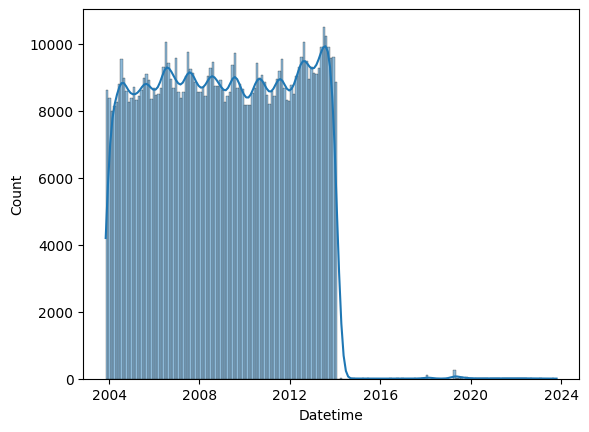

In [16]:
sns.histplot(data['Datetime'], kde=True)
plt.show()

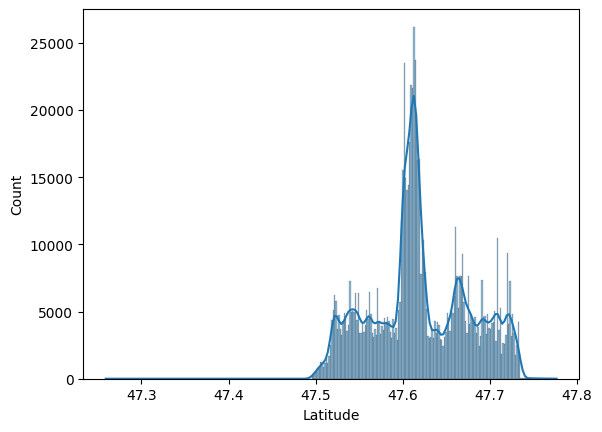

In [17]:
sns.histplot(data['Latitude'], kde=True)
plt.show()

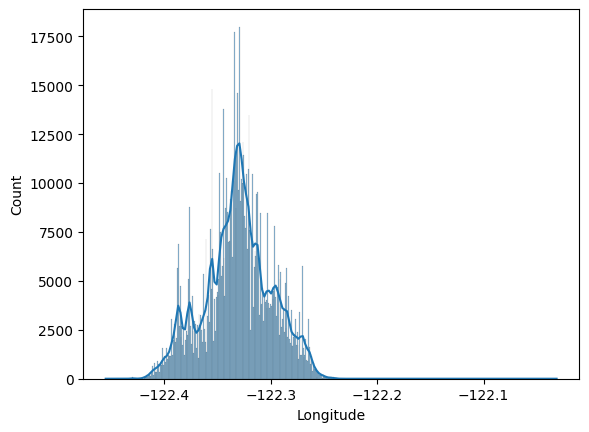

In [18]:
sns.histplot(data['Longitude'], kde=True)
plt.show()

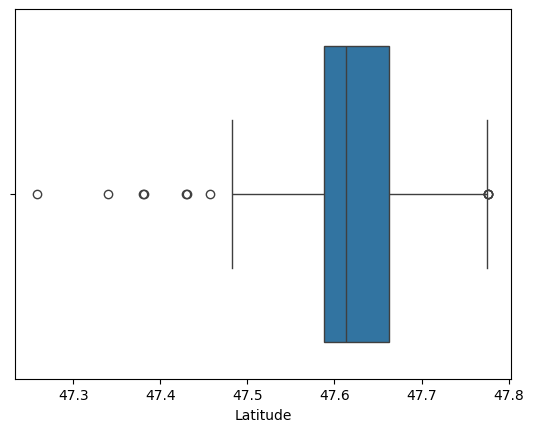

In [19]:
sns.boxplot(x='Latitude', data=data)
plt.show()

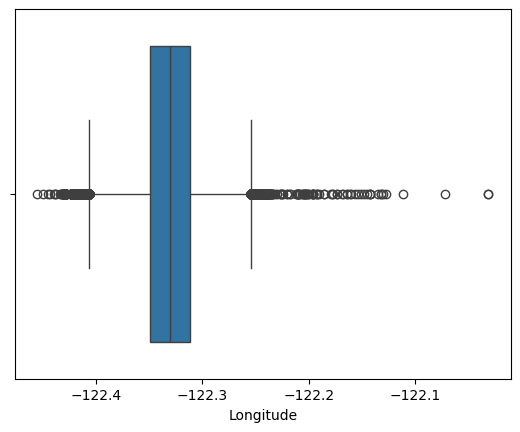

In [20]:
sns.boxplot(x='Longitude', data=data)
plt.show()

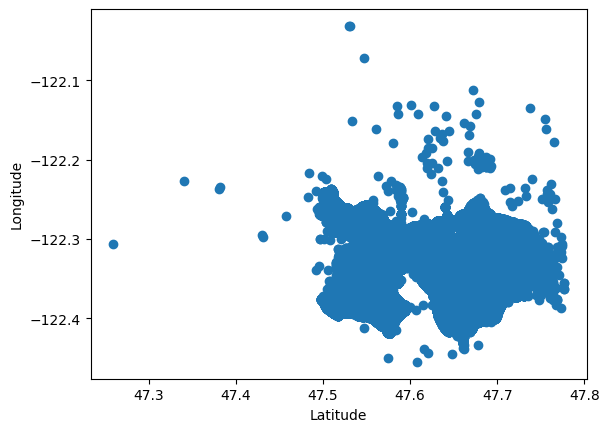

In [21]:
plt.scatter(data['Latitude'], data['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

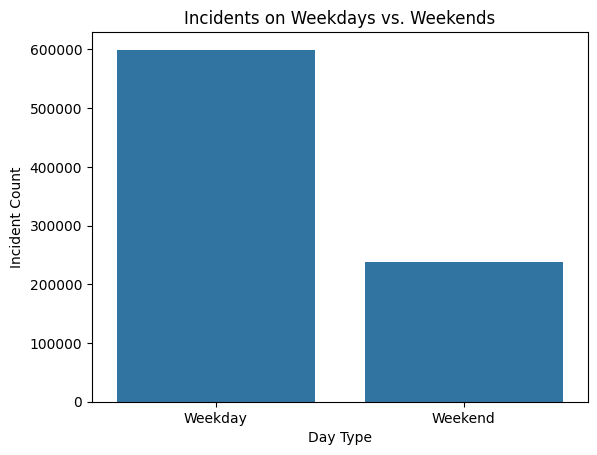

In [6]:
# convert to datetime
data["Datetime"] = pd.to_datetime(data["Datetime"])
data["DayOfWeek"] = data["Datetime"].dt.weekday
data["IsWeekend"] = data["DayOfWeek"] >= 5

# Count incidents by weekday/weekend
incident_counts = data.groupby('IsWeekend')['Incident Number'].count()

# Create a bar plot
sns.barplot(x=incident_counts.index, y=incident_counts.values)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Incident Count')
plt.title('Incidents on Weekdays vs. Weekends')
plt.show()

In [7]:
#top regions
top_regions_total = data['Address'].value_counts().head(5)
#top jurisdictions
top_regions_jurisdiction = data.groupby('Address')['Incident Number'].count().nlargest(5)
#incidents per year
data['Year'] = pd.to_datetime(data['Datetime']).dt.year
top_regions_yearly = data.groupby(['Year', 'Address'])['Incident Number'].count().groupby(level=0, group_keys=False).nlargest(5)
#incidents per month
data['Month'] = pd.to_datetime(data['Datetime']).dt.month
top_regions_monthly = data.groupby(['Month', 'Address'])['Incident Number'].count().groupby(level=0, group_keys=False).nlargest(5)
#incidents per week
#data['Week'] = pd.to_datetime(data['Datetime']).dt.week
#top_regions_weekly = df.groupby(['Week', 'Address'])['Incident Number'].count().groupby(level=0, group_keys=False).nlargest(5)
#incidents per day
data['Day'] = pd.to_datetime(data['Datetime']).dt.date
top_regions_daily = data.groupby(['Day', 'Address'])['Incident Number'].count().groupby(level=0, group_keys=False).nlargest(5)

In [8]:
print(top_regions_daily .head())

Day         Address          
2003-11-07  110 Summit Av E      12
            311 E Pine St         4
            1226 16th Av W        3
            113 23rd Av S         2
            11650 Beacon Av S     2
Name: Incident Number, dtype: int64


In [9]:
print(top_regions_yearly .head())

Year    Address       
2003.0  2318 4th Av       96
        509 3rd Av        42
        2121 26th Av S    34
        223 Yesler Way    34
        500 5th Av        33
Name: Incident Number, dtype: int64


In [10]:
print(top_regions_monthly.head())

Month  Address         
1.0    517 3rd Av          348
       318 2nd Av Et  S    338
       500 5th Av          310
       509 3rd Av          232
       223 Yesler Way      219
Name: Incident Number, dtype: int64


In [11]:
#popular incidents on a daily basis
daily_popular_incidents = data.groupby(data['Datetime'].dt.date)['Type'].value_counts().groupby(level=0).idxmax()
print(daily_popular_incidents.head())

Datetime
2003-11-07    (2003-11-07, Aid Response)
2003-11-08    (2003-11-08, Aid Response)
2003-11-09    (2003-11-09, Aid Response)
2003-11-10    (2003-11-10, Aid Response)
2003-11-11    (2003-11-11, Aid Response)
Name: count, dtype: object


In [12]:
#popular incidents on weekdays and weekends
weekday_popular_incidents = data[data['IsWeekend'] == False]['Type'].value_counts().idxmax()
weekend_popular_incidents = data[data['IsWeekend'] == True]['Type'].value_counts().idxmax()
print(weekday_popular_incidents)
print(weekend_popular_incidents)

Aid Response
Aid Response


In [13]:
# regions that qualify for mobile emergency patrols
data['Week'] = data['Datetime'].dt.strftime('%Y-%U')
incident_counts = data.groupby(['Address', 'Type', 'Week']).size().reset_index(name='Count')
qualified_regions = incident_counts[incident_counts['Count'] > 50]['Address'].unique()
print(qualified_regions.tolist())

[]


In [14]:
#how much revenue the private company makes for every year of its operation
medevac_counts = (data['Type'] == 'Medic Response').groupby(data['Year']).size()
firevac_counts = (data['Type'] == 'Fire Response').groupby(data['Year']).size()
evacuation_counts = medevac_counts + firevac_counts
rate_per_evacuation = 100
revenue_per_year = evacuation_counts * rate_per_evacuation
print(revenue_per_year)

Year
2003.0     2314600
2004.0    15752600
2005.0    15887000
2006.0    16620000
2007.0    16305400
2008.0    16369800
2009.0    16027800
2010.0    15949400
2011.0    15941600
2012.0    16902000
2013.0    17776000
2014.0     1563600
2015.0        9000
2016.0        9000
2017.0        9600
2018.0       30600
2019.0       79400
2020.0       20800
2021.0       18800
2022.0       15000
2023.0        8600
Name: Type, dtype: int64
